<a href="https://colab.research.google.com/github/Souvik2215151029/Lab-Assignment_id-29/blob/main/HW_05_id_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test decision (h): 0
p-value: 0.9550
KS statistic: 0.1496


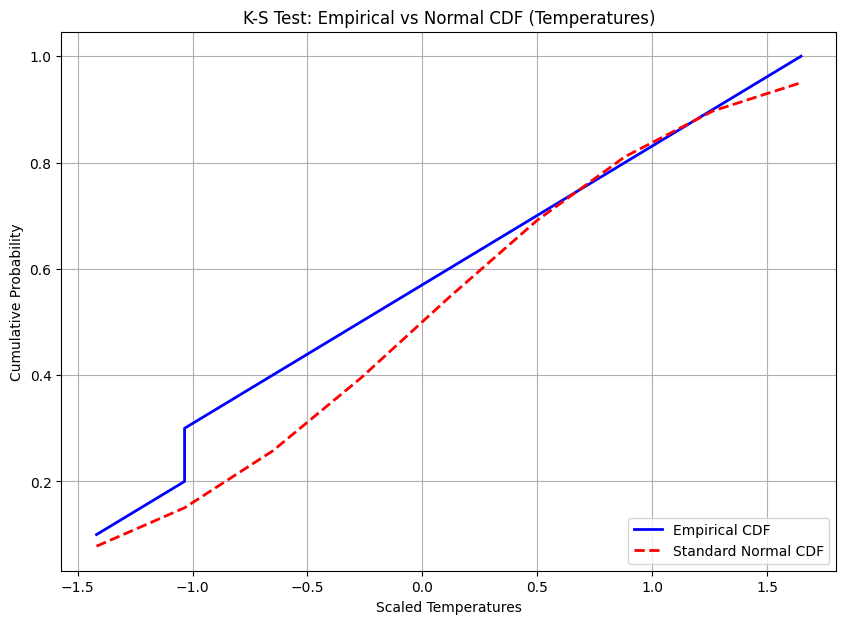

Conclusion: The null hypothesis cannot be rejected. The temperature data may come from a normal distribution.


In [13]:
import numpy as np
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt

# Daily temperatures dataset
daily_temperatures = np.array([15, 17, 16, 14, 18, 20, 19, 15, 21, 22])

# Hypothesized mean and standard deviation of the normal distribution
mean_temp = np.mean(daily_temperatures)  # Calculate mean from data
std_dev_temp = np.std(daily_temperatures)  # Calculate standard deviation from data

# Scale the temperature data
scaled_temp = (daily_temperatures - mean_temp) / std_dev_temp

# Perform the K-S test
ks_result = kstest(scaled_temp, 'norm')

# Print results
print(f"Test decision (h): {int(ks_result.pvalue < 0.05)}") # 1 if reject, 0 otherwise
print(f"p-value: {ks_result.pvalue:.4f}")
print(f"KS statistic: {ks_result.statistic:.4f}")

# Empirical CDF
sorted_temp = np.sort(scaled_temp)
ecdf_y_temp = np.arange(1, len(daily_temperatures)+1) / len(daily_temperatures)

# Standard normal CDF
normal_cdf_temp = norm.cdf(sorted_temp)

# Plot
plt.figure(figsize=(10, 7))
plt.plot(sorted_temp, ecdf_y_temp, label='Empirical CDF', color='blue', linewidth=2)
plt.plot(sorted_temp, normal_cdf_temp, label='Standard Normal CDF', color='red', linestyle='--', linewidth=2)
plt.title("K-S Test: Empirical vs Normal CDF (Temperatures)")
plt.xlabel("Scaled Temperatures")
plt.ylabel("Cumulative Probability")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Conclusion based on the p-value:
alpha = 0.05
if ks_result.pvalue < alpha:
    print("Conclusion: The null hypothesis is rejected. The temperature data does not appear to come from a normal distribution.")
else:
    print("Conclusion: The null hypothesis cannot be rejected. The temperature data may come from a normal distribution.")
